In [44]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns


In [118]:
#Load data
df = pd.read_csv('ipl_matches.csv')
df['date'] = pd.to_datetime(df['date'])

#df['runs_won_by'] = df['runs_won_by'].apply(lambda x: True if x is not None else false)



In [56]:
df.head()

,Unnamed: 0,team1,team2,date,year,time,place,toss,toss_decision,winner,tied_abandoned,runs_won_by,wickets_won_by,balls_remaining
0,0.0,ROYAL CHALLENGERS BANGALORE,KOLKATA KNIGHT RIDERS,2008-04-18,2008.0,02:30 PM GMT / 08:00 PM LOCAL,"M.Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,bowl,Kolkata Knight Riders,NaN,140.0,NaN,NaN
1,1.0,KINGS XI PUNJAB,CHENNAI SUPER KINGS,2008-04-19,2008.0,11:30 AM GMT / 05:00 PM LOCAL,"Punjab Cricket Association IS Bindra Stadium, ...",Chennai Super Kings,bat,Chennai Super Kings,NaN,33.0,NaN,NaN
2,2.0,DELHI CAPITALS,RAJASTHAN ROYALS,2008-04-19,2008.0,03:00 PM GMT / 08:30 PM LOCAL,"Arun Jaitley Stadium, Delhi",Rajasthan Royals,bat,Delhi Daredevils,NaN,NaN,9.0,29.0
3,3.0,KOLKATA KNIGHT RIDERS,DECCAN CHARGERS,2008-04-20,2008.0,10:30 AM GMT / 04:00 PM LOCAL,"Eden Gardens, Kolkata",Deccan Chargers,bat,Kolkata Knight Riders,NaN,NaN,5.0,6.0
4,4.0,MUMBAI INDIANS,ROYAL CHALLENGERS BANGALORE,2008-04-20,2008.0,02:30 PM GMT / 08:00 PM LOCAL,"Wankhede Stadium, Mumbai",Mumbai Indians,bat,Royal Challengers Bangalore,NaN,NaN,5.0,2.0


In [122]:
df['runs_won_by'].fillna(0,inplace=True)
df['wickets_won_by'].fillna(0,inplace=True)
df['balls_remaining'].fillna(0,inplace=True)
df['tied_abandoned'].fillna('False',inplace=True)
df['winner'].replace("Delhi Daredevils ", "Delhi Capitals", inplace=True)
df['winner'].replace("Delhi Capitals", "Delhi Capitals", inplace=True)

In [100]:
df.head()

,Unnamed: 0,team1,team2,date,year,time,place,toss,toss_decision,winner,tied_abandoned,runs_won_by,wickets_won_by,balls_remaining
0,0,ROYAL CHALLENGERS BANGALORE,KOLKATA KNIGHT RIDERS,2008-04-18,2008,02:30 PM GMT / 08:00 PM LOCAL,"M.Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,bowl,Kolkata Knight Riders,False,140.0,0.0,0.0
1,1,KINGS XI PUNJAB,CHENNAI SUPER KINGS,2008-04-19,2008,11:30 AM GMT / 05:00 PM LOCAL,"Punjab Cricket Association IS Bindra Stadium, ...",Chennai Super Kings,bat,Chennai Super Kings,False,33.0,0.0,0.0
2,2,DELHI CAPITALS,RAJASTHAN ROYALS,2008-04-19,2008,03:00 PM GMT / 08:30 PM LOCAL,"Arun Jaitley Stadium, Delhi",Rajasthan Royals,bat,Delhi Capitals,False,0.0,9.0,29.0
3,3,KOLKATA KNIGHT RIDERS,DECCAN CHARGERS,2008-04-20,2008,10:30 AM GMT / 04:00 PM LOCAL,"Eden Gardens, Kolkata",Sunrisers Hyderabad,bat,Kolkata Knight Riders,False,0.0,5.0,6.0
4,4,MUMBAI INDIANS,ROYAL CHALLENGERS BANGALORE,2008-04-20,2008,02:30 PM GMT / 08:00 PM LOCAL,"Wankhede Stadium, Mumbai",Mumbai Indians,bat,Royal Challengers Bangalore,False,0.0,5.0,2.0


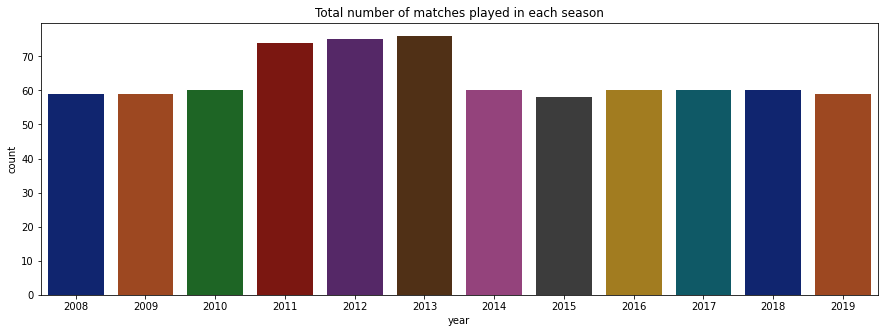

In [120]:
plt.subplots(figsize = (15,5))
sns.countplot(x = 'year', data = df, palette= 'dark')
plt.title('Total number of matches played in each season')
plt.show()

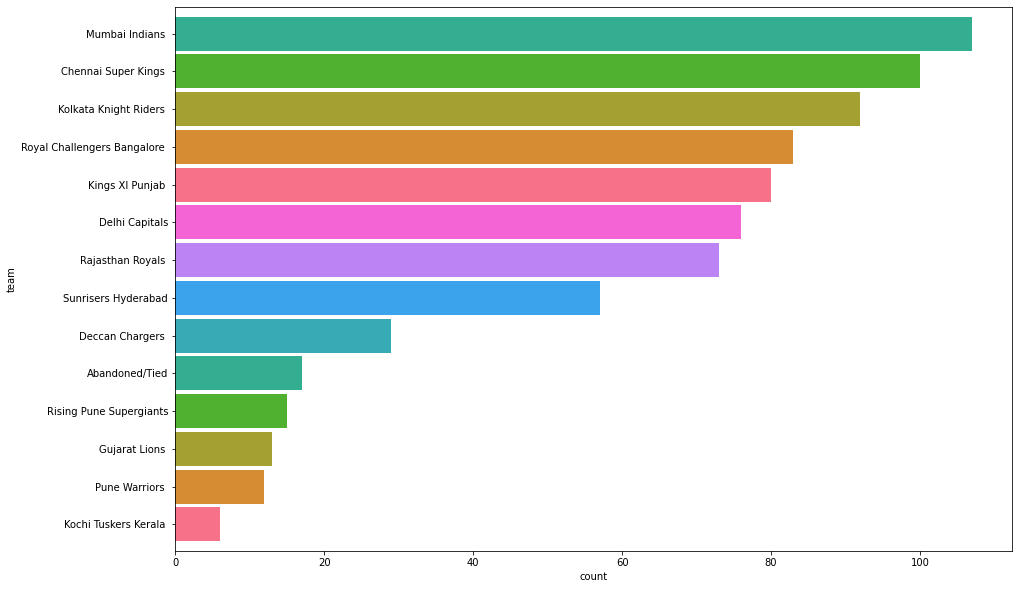

In [124]:
plt.subplots(figsize = (15,10))
ax = df['winner'].value_counts().sort_values(ascending = True).plot.barh(width = .9, color = sns.color_palette("husl", 9))
ax.set_xlabel('count')
ax.set_ylabel('team')
plt.show()

In [129]:
cols_to_drop = ["time", "place"]
df.drop(columns =cols_to_drop, axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   team1            760 non-null    object        
 1   team2            760 non-null    object        
 2   date             760 non-null    datetime64[ns]
 3   year             760 non-null    int64         
 4   time             760 non-null    object        
 5   place            760 non-null    object        
 6   toss             760 non-null    object        
 7   toss_decision    760 non-null    object        
 8   winner           760 non-null    object        
 9   tied_abandoned   760 non-null    object        
 10  runs_won_by      760 non-null    float64       
 11  wickets_won_by   760 non-null    float64       
 12  balls_remaining  760 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 77.3+ KB


,team1,team2,date,year,toss,toss_decision,winner,tied_abandoned,runs_won_by,wickets_won_by,balls_remaining
0,ROYAL CHALLENGERS BANGALORE,KOLKATA KNIGHT RIDERS,2008-04-18,2008,Royal Challengers Bangalore,bowl,Kolkata Knight Riders,False,140.0,0.0,0.0
1,KINGS XI PUNJAB,CHENNAI SUPER KINGS,2008-04-19,2008,Chennai Super Kings,bat,Chennai Super Kings,False,33.0,0.0,0.0
2,DELHI CAPITALS,RAJASTHAN ROYALS,2008-04-19,2008,Rajasthan Royals,bat,Delhi Capitals,False,0.0,9.0,29.0
3,KOLKATA KNIGHT RIDERS,DECCAN CHARGERS,2008-04-20,2008,Deccan Chargers,bat,Kolkata Knight Riders,False,0.0,5.0,6.0
4,MUMBAI INDIANS,ROYAL CHALLENGERS BANGALORE,2008-04-20,2008,Mumbai Indians,bat,Royal Challengers Bangalore,False,0.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
755,MUMBAI INDIANS,KOLKATA KNIGHT RIDERS,2019-05-05,2019,Mumbai Indians,bowl,Mumbai Indians,False,0.0,9.0,0.0
756,MUMBAI INDIANS,CHENNAI SUPER KINGS,2019-05-07,2019,Chennai Super Kings,bat,Mumbai Indians,False,0.0,6.0,0.0
757,DELHI CAPITALS,SUNRISERS HYDERABAD,2019-05-08,2019,Delhi Capitals,bowl,Delhi Capitals,False,0.0,2.0,0.0
758,CHENNAI SUPER KINGS,DELHI CAPITALS,2019-05-10,2019,Chennai Super Kings,bowl,Chennai Super Kings,False,0.0,6.0,0.0


In [132]:
deep_df = df.copy(deep = True)

deep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   team1            760 non-null    object        
 1   team2            760 non-null    object        
 2   date             760 non-null    datetime64[ns]
 3   year             760 non-null    int64         
 4   time             760 non-null    object        
 5   place            760 non-null    object        
 6   toss             760 non-null    object        
 7   toss_decision    760 non-null    object        
 8   winner           760 non-null    object        
 9   tied_abandoned   760 non-null    object        
 10  runs_won_by      760 non-null    float64       
 11  wickets_won_by   760 non-null    float64       
 12  balls_remaining  760 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 77.3+ KB


In [137]:
numerical_columns = [
    col for col in df.columns if 
    (df[col].dtype == 'int64' or 
     df[col].dtype == 'float64' 
    ) and 
    col != 'Exited'

]

numerical_columns

['year', 'runs_won_by', 'wickets_won_by', 'balls_remaining']

<AxesSubplot:title={'center':'runs_won_by'}, xlabel='winner'>

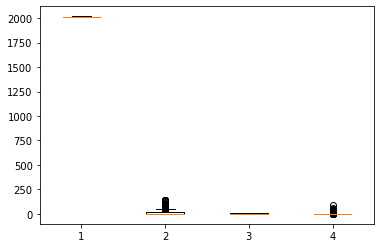

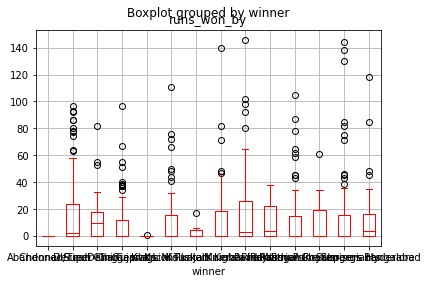

In [144]:
plt.boxplot(df[numerical_columns])

df.boxplot(by = 'winner', grid = 'True', column = ['runs_won_by'], color = 'red')